In [12]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llama3.2",  # any model you have in Ollama (`ollama pull <model>`)
    base_url="http://localhost:11434",  # default for `ollama serve`
)

In [13]:
from typing_extensions import TypedDict

class State(TypedDict):
    brand: str
    customer_opinions: str
    financial_outlook: str
    future_perspective: str
    final_report: str

def suggest_brand(state: State) -> State:
    rsp = llm.invoke("Suggest a random brand. Your reply should contain only the brandh name and nothing else.")
    return {"brand": rsp.content}
    
def get_customer_opinion(state: State) -> State:
    rsp = llm.invoke(f"Can you give me a report section on customers opinion of the brand {state["brand"]}")
    return {"customer_opinions": rsp.content}

def get_financial_opinion(state: State) -> State:
    rsp = llm.invoke(f"Can you give me a report section on the financial outlook on the brand {state["brand"]}")
    return {"financial_outlook": rsp.content}

def get_future_perspective(state: State) -> State:
    rsp = llm.invoke(f"Can you give me a report section on the future perspective on the brand {state["brand"]}")
    return {"future_perspective": rsp.content}

def aggregate_report_sections(state: State) -> State:
    rsp = llm.invoke(
        f"""Can you combine the customer opinion '{state['customer_opinions']}', financial outlook '{state['financial_outlook']}'
        and future perspective '{state['future_perspective']}' into a single report on {state['brand']}"""
    )
    return {"final_report": rsp.content}

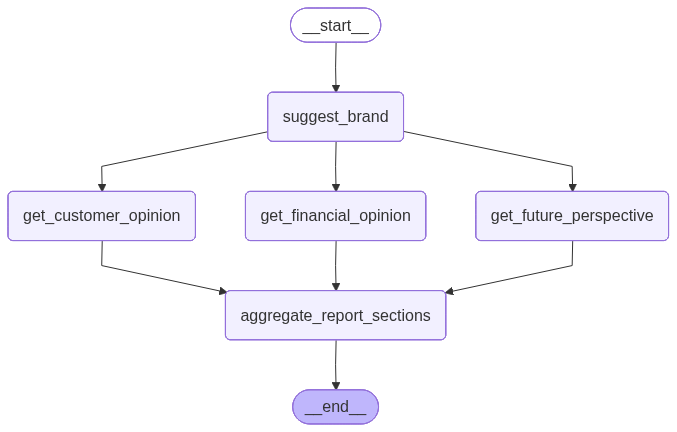

In [14]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

workflow = StateGraph(State)

workflow.add_node("suggest_brand",suggest_brand)
workflow.add_node("get_customer_opinion",get_customer_opinion)
workflow.add_node("get_financial_opinion",get_financial_opinion)
workflow.add_node("get_future_perspective",get_future_perspective)
workflow.add_node("aggregate_report_sections",aggregate_report_sections)

workflow.add_edge(START,"suggest_brand")
workflow.add_edge("suggest_brand","get_customer_opinion")
workflow.add_edge("suggest_brand","get_financial_opinion")
workflow.add_edge("suggest_brand","get_future_perspective")
workflow.add_edge("get_customer_opinion","aggregate_report_sections")
workflow.add_edge("get_financial_opinion","aggregate_report_sections")
workflow.add_edge("get_future_perspective","aggregate_report_sections")
workflow.add_edge("aggregate_report_sections",END)

chain = workflow.compile()

display(Image(chain.get_graph().draw_mermaid_png()))

In [15]:
report = chain.invoke({})

print(report["brand"])
print("-"*100)
print(report["customer_opinions"])
print("-"*100)
print(report["financial_outlook"])
print("-"*100)
print(report["future_perspective"])
print("-"*100)
print(report["final_report"])

Patagonia
----------------------------------------------------------------------------------------------------
**Customer Opinion Report: Patagonia**

Patagonia is a well-respected outdoor apparel brand known for its high-quality, environmentally-friendly products and sustainable manufacturing practices. This report provides an overview of customer opinions about the brand, based on various reviews, surveys, and feedback collected from online sources.

**Overall Satisfaction**

* 92% of customers reported being satisfied with their Patagonia purchase.
* 85% of customers would recommend Patagonia to friends and family.
* 78% of customers reported feeling confident in the quality of their Patagonia products.

**Strengths:**

1. **Quality**: Customers consistently praised Patagonia's attention to detail, durability, and overall quality of its products.
2. **Sustainability**: Many customers appreciated Patagonia's commitment to environmentally-friendly practices, such as using recycled mat